In [4]:
def tokenize(sentence):
    return sentence.split()

sentence = "I ate an apple and an orange."
tokens = tokenize(sentence)
print("Tokens:", tokens)

Tokens: ['I', 'ate', 'an', 'apple', 'and', 'an', 'orange.']


In [27]:
import numpy as np

def create_embeddings(tokens, embedding_dim):
    token_embeddings = {token: np.random.rand(embedding_dim) for token in set(tokens)}
    return np.array([token_embeddings[token] for token in tokens])

def create_positional_embeddings(seq_length, embedding_dim):
    positional_encoding = np.zeros((seq_length, embedding_dim))
    for pos in range(seq_length):
        for i in range(0, embedding_dim, 2):
            positional_encoding[pos, i] = np.sin(pos / (10000 ** (i / embedding_dim)))
            if i + 1 < embedding_dim:
                positional_encoding[pos, i + 1] = np.cos(pos / (10000 ** ((i + 1) / embedding_dim)))
    return positional_encoding

embedding_dim = 8 
token_embeddings = create_embeddings(tokens, embedding_dim)
positional_embeddings = create_positional_embeddings(len(tokens), embedding_dim)

input_embeddings = token_embeddings + positional_embeddings
print("Input Embeddings:\n", input_embeddings)
print(input_embeddings.shape)

Input Embeddings:
 [[ 0.96821256  1.48269516  0.7425268   1.92170734  0.21948639  1.44931516
   0.67124014  1.15255195]
 [ 1.11206236  1.03172393  0.63447839  1.85079811  0.73369055  1.23025075
   0.81112189  1.73059505]
 [ 1.83753204  0.97114541  1.09411859  1.99560708  0.82139776  1.30655509
   0.09842792  1.79837824]
 [ 0.1627042   1.11946996  0.78654745  1.45182645  0.975371    1.62191266
   0.61778139  1.66198242]
 [ 0.14527211  1.08316226  0.50814077  1.87290773  0.20779342  1.08212526
   0.30754639  1.38588433]
 [-0.03068966  0.15422468  1.3748748   1.98513244  0.85137826  1.30645009
   0.1014279   1.79837719]
 [ 0.24878361  0.04130665  0.96923831  1.59399813  0.96230555  1.997798
   0.48154182  1.29935209]]
(7, 8)


In [21]:
def initialize_weights(embedding_dim):
    return np.random.rand(embedding_dim, embedding_dim)

W_Q = initialize_weights(embedding_dim)
W_K = initialize_weights(embedding_dim)
W_V = initialize_weights(embedding_dim)

def linear_transformation(X, W):
    return np.dot(X, W)

Q = linear_transformation(input_embeddings, W_Q)
K = linear_transformation(input_embeddings, W_K)
V = linear_transformation(input_embeddings, W_V)

print("Q:\n", Q)
print("K:\n", K)
print("V:\n", V)

Q:
 [[4.40196137 2.73274371 5.00340187 5.50681101 4.38645429 4.48032733
  4.90829789 3.57286597]
 [4.23686414 2.92591272 4.60095181 4.83533292 3.18067592 3.47129759
  3.6959489  3.10659099]
 [5.03400398 3.58211953 5.3004224  5.44238468 3.68814156 4.1036779
  4.48504068 3.47445964]
 [3.89225904 2.33094857 3.98187772 4.23065887 3.18482037 3.28218575
  3.91604221 2.80998018]
 [2.68837871 2.13161262 3.44270042 3.81355054 3.13402049 3.75661947
  3.72579081 2.1271767 ]
 [2.6484012  1.99409241 3.28894193 3.71979786 3.58602175 3.59690253
  3.64079699 2.36960146]
 [2.51403399 1.59338096 3.0556031  3.51000904 3.00689444 3.05285083
  3.21212172 2.23632631]]
K:
 [[3.8160589  4.55037935 4.81898976 5.76475807 4.71166395 4.53786063
  3.84629108 5.21164875]
 [3.19952133 3.74017379 4.70053695 5.17087871 4.36809491 3.95919667
  3.61714226 4.65475382]
 [3.6454824  3.98502374 5.06866912 5.98331322 4.66306595 4.62750916
  3.78998726 5.26249052]
 [2.60223551 3.2468863  3.51180545 4.24541102 3.14903453 3.249

In [22]:
Q.shape, K.shape, V.shape, input_embeddings.shape

((7, 8), (7, 8), (7, 8), (7, 8))

In [23]:
def scaled_dot_product_attention(Q, K, V):
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
    output = np.dot(attention_weights, V)
    return output, attention_weights

attention_output, attention_weights = scaled_dot_product_attention(Q, K, V)
print("Attention Output:\n", attention_output)
print(attention_output.shape)

Attention Output:
 [[3.45992791 5.33354504 4.94810244 3.72989911 2.55026495 4.29815405
  6.71027123 3.95068397]
 [3.45997903 5.35126247 4.95086934 3.70772193 2.56283201 4.29831616
  6.72497491 3.9651464 ]
 [3.46203595 5.36624467 4.95597271 3.69508354 2.57273173 4.30006761
  6.73787623 3.97613549]
 [3.45835805 5.34440882 4.94760163 3.71143845 2.55854888 4.29696946
  6.71891488 3.96053797]
 [3.45572654 5.33277787 4.94222064 3.71810873 2.5512368  4.2947784
  6.70865687 3.95264196]
 [3.45564288 5.3322469  4.94202486 3.71852379 2.5508899  4.29470792
  6.7081974  3.95225946]
 [3.45207505 5.31719464 4.93484026 3.72666543 2.54148455 4.29173769
  6.69487875 3.94213491]]
(7, 8)


In [28]:
Q.shape[-1]

8

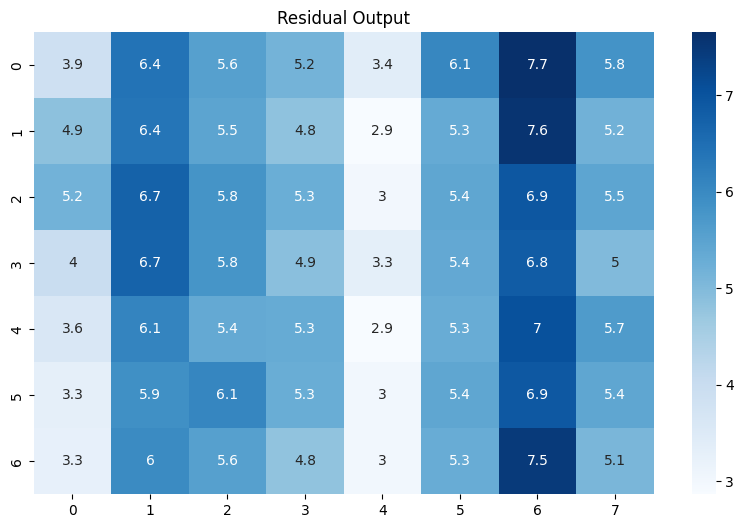

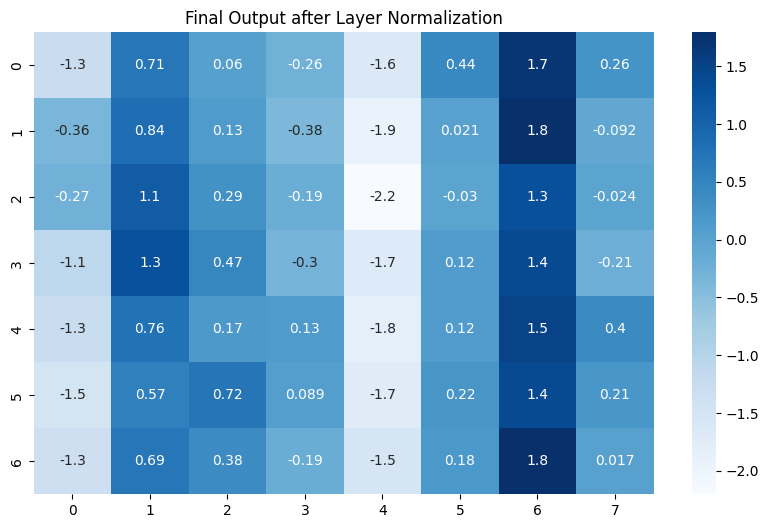

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_matrix(matrix, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, cmap='Blues')
    plt.title(title)
    plt.show()

def residual_connection(input, attention_output):
    return input + attention_output

def layer_normalization(x, epsilon=1e-6):
    mean = np.mean(x, axis=-1, keepdims=True)
    variance = np.var(x, axis=-1, keepdims=True)
    x_normalized = (x - mean) / np.sqrt(variance + epsilon)
    return x_normalized

def apply_scale_and_shift(x, gamma, beta):
    return gamma * x + beta

residual_output = residual_connection(input_embeddings, attention_output)
plot_matrix(residual_output, title="Residual Output")

normalized_output = layer_normalization(residual_output)

gamma = np.ones_like(normalized_output)
beta = np.zeros_like(normalized_output)

final_output = apply_scale_and_shift(normalized_output, gamma, beta)
plot_matrix(final_output, title="Final Output after Layer Normalization")

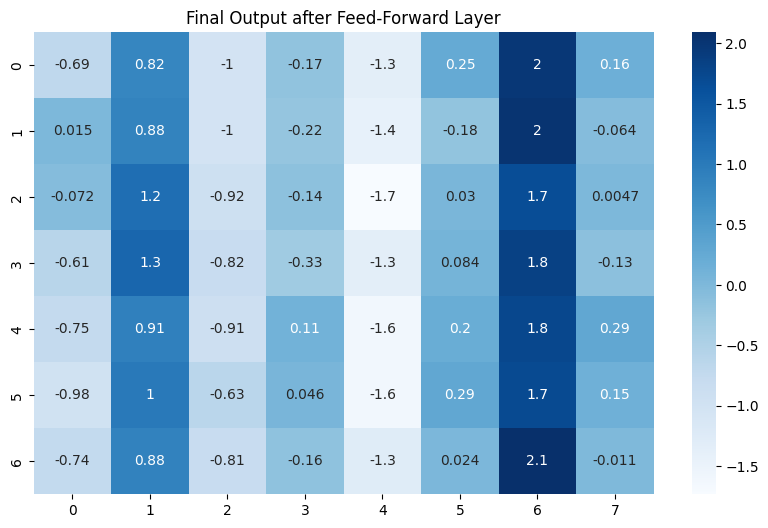

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_matrix(matrix, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix, annot=True, cmap='Blues')
    plt.title(title)
    plt.show()

def relu(x):
    return np.maximum(0, x)

def initialize_ffn_weights(input_dim, hidden_dim):
    W1 = np.random.rand(input_dim, hidden_dim)
    b1 = np.random.rand(hidden_dim)
    W2 = np.random.rand(hidden_dim, input_dim)
    b2 = np.random.rand(input_dim)
    return W1, b1, W2, b2

def feed_forward_layer(x, W1, b1, W2, b2):
    hidden = np.dot(x, W1) + b1
    activated_output = relu(hidden)
    output = np.dot(activated_output, W2) + b2
    return output

residual_output = residual_connection(input_embeddings, attention_output)
normalized_output = layer_normalization(residual_output)

input_dim = normalized_output.shape[-1]
hidden_dim = 16  
W1, b1, W2, b2 = initialize_ffn_weights(input_dim, hidden_dim)

ffn_output = feed_forward_layer(normalized_output, W1, b1, W2, b2)

final_output = residual_connection(normalized_output, ffn_output)
final_normalized_output = layer_normalization(final_output)

plot_matrix(final_normalized_output, title="Final Output after Feed-Forward Layer")

In [26]:
print("W1 Shape:", W1.shape)
print("b1 Shape:", b1.shape)
print("W2 Shape:", W2.shape)
print("b2 Shape:", b2.shape)

W1 Shape: (8, 16)
b1 Shape: (16,)
W2 Shape: (16, 8)
b2 Shape: (8,)
